# Brazillian Coins Classifier Image

### Mount My Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Colleting DataSet

In [0]:
#import some librarys
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import transform
import os
%matplotlib inline


X_data.shape: (3106, 128, 128, 3) and y_data.shape: ['100', '5', '50', '25', '25', '5', '5', '50', '25', '5', '5', '10', '25', '25', '50', '25', '25', '100', '25', '100', '10', '5', '50', '10', '10', '25', '10', '5', '5', '25', '5', '10', '100', '25', '10', '10', '10', '5', '25', '5', '5', '10', '100', '5', '25', '100', '25', '10', '25', '5', '5', '100', '5', '5', '10', '10', '25', '100', '100', '50', '50', '50', '50', '5', '100', '5', '100', '10', '5', '25', '25', '5', '100', '100', '5', '10', '100', '5', '100', '50', '100', '100', '50', '100', '10', '5', '100', '100', '5', '50', '100', '100', '50', '100', '25', '50', '50', '50', '100', '100', '5', '25', '50', '100', '25', '100', '50', '10', '100', '50', '50', '10', '10', '25', '5', '10', '5', '5', '100', '100', '10', '5', '50', '50', '10', '50', '50', '5', '50', '100', '100', '100', '100', '25', '25', '5', '5', '100', '5', '25', '100', '50', '25', '50', '100', '100', '10', '100', '10', '50', '5', '25', '100', '100', '50', '25', '100'

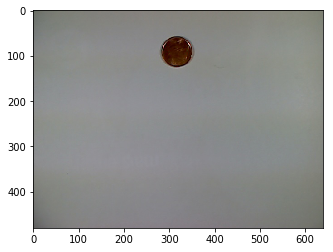

In [0]:
#Colleting the dataset Brazillian Coins
width = 128
height = 128

def get_dataset(path_images):
    images = glob.glob(path_images+"*.jpg")
    # print(images)
    X = []
    y = []
    for image in images:
        img = Image.open(image)
        plt.imshow(img)
        img = np.asarray(img)
        # print(img.shape)
        a = image[66:]
        layer = a.split("_")
        # print(layer[0])
        img = transform.resize(img,(width, height))
        X.append(img)
        y.append(layer[0])
    
    # print(len(X))
    X = np.asarray(X)
    return X, y

path_images = '/content/drive/My Drive/BrazilianCoins/classification_dataset/all/'
X_data, y_data = get_dataset(path_images)
print("X_data.shape: "+str(X_data.shape)+ " and y_data.shape: "+str(y_data))
print(X_data[0], y_data[0])

### Analysing the image and Train & Test the dataset

Label the image 100


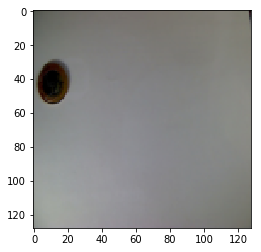

In [0]:
#Analysis the images
plt.imshow(X_data[0])
print("Label the image {}".format(y_data[0]))

Label the image 5
X_data[1].shape: (128, 128, 3)


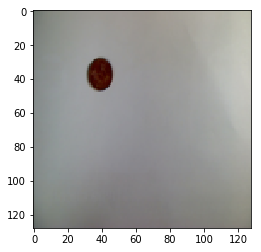

In [0]:
#Analysis the images
plt.imshow(X_data[1])
print("Label the image {}".format(y_data[1]))
print("X_data[{}].shape: {}".format(1, X_data[1].shape))

Label the image 50
X_data[2].shape: (128, 128, 3)


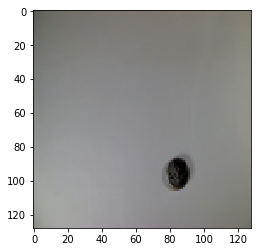

In [0]:
#Analysis the images
plt.imshow(X_data[2])
print("Label the image {}".format(y_data[2]))
print("X_data[{}].shape: {}".format(2, X_data[2].shape))

In [0]:
#Building the CNN
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers.normalization import BatchNormalization

# Declare variables

BATCH_NORM = False

batch_size = 128
num_class = 5
epochs = 20
# data_augmentation = True


model = Sequential()
# Step 1 - Convolution, Normalization and Activation layers
model.add(Conv2D(128, (3, 3), padding='same', input_shape=X_data.shape[1:], name='block1_conv1'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))


# Step 2 - Adding a Second Convolution layer
model.add(Conv2D(128, (3, 3), padding='same', name='block1_conv2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))


# Step 2 - Adding a Second Convolution layer
model.add(Conv2D(64, (3, 3), padding='same', name='block1_conv3'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

model.add(Flatten())

model.add(Dense(256, name='fc2'))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class))
model.add(BatchNormalization()) if BATCH_NORM else None
model.add(Activation('softmax'))


opt = RMSprop(lr=0.0001, rho=0.9)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 128)     3584      
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 128)     0         
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
activation_17 (Activation)   (None, 128, 128, 128)     0         
_________________________________________________________________
block1_conv3 (Conv2D)        (None, 128, 128, 64)      73792     
_________________________________________________________________
activation_18 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)       

In [0]:
#Np_utils to categorical layers
y_data = np.asarray(y_data)
y_data = y_data.astype('int')
y_data = np.true_divide(y_data[:], 100)
y_data

array([1.  , 0.05, 0.5 , ..., 1.  , 0.25, 0.05])

In [0]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=1)

print("X_train.shape: {}\t y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_val.shape: {}\t y_val.shape: {}".format(X_val.shape, y_val.shape))
print("X_test.shape: {}\t y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (1987, 128, 128, 3)	 y_train.shape: (1987,)
X_val.shape: (497, 128, 128, 3)	 y_val.shape: (497,)
X_test.shape: (622, 128, 128, 3)	 y_test.shape: (622,)


In [0]:
# Convert and pre-processing
from keras.utils import np_utils

print("y_train[{}] = {}".format(0, y_train[0]))

y_train = np_utils.to_categorical(y_train, num_class)
y_val = np_utils.to_categorical(y_val, num_class)
y_test = np_utils.to_categorical(y_test, num_class)

print("y_train[{}] = {}".format(0, y_train))

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

#Normalize
X_train  /= 255
X_val /= 255
X_test /= 255

y_train[0] = 0.5
y_train[0] = [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [0]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val,y_val), shuffle=True)

Train on 1987 samples, validate on 497 samples
Epoch 1/20
1987/1987 [==============================] - 27s 14ms/step - loss: 0.7231 - acc: 0.7786 - val_loss: 0.5148 - val_acc: 0.8089
Epoch 2/20
1987/1987 [==============================] - 26s 13ms/step - loss: 0.5263 - acc: 0.8057 - val_loss: 0.5130 - val_acc: 0.8089
Epoch 3/20
1987/1987 [==============================] - 26s 13ms/step - loss: 0.5324 - acc: 0.8037 - val_loss: 0.4971 - val_acc: 0.8089
Epoch 4/20
1987/1987 [==============================] - 26s 13ms/step - loss: 0.5232 - acc: 0.8047 - val_loss: 0.5359 - val_acc: 0.8089
Epoch 5/20
1987/1987 [==============================] - 26s 13ms/step - loss: 0.5114 - acc: 0.8042 - val_loss: 0.5020 - val_acc: 0.8089
Epoch 6/20
1987/1987 [==============================] - 26s 13ms/step - loss: 0.5194 - acc: 0.8047 - val_loss: 0.4962 - val_acc: 0.8089
Epoch 7/20
1987/1987 [==============================] - 26s 13ms/step - loss: 0.5144 - acc: 0.8047 - val_loss: 0.4910 - val_acc: 0.8089
E

### Accuracy Check

In [0]:
score = model.evaluate(X_test, y_test)
print("")
print("Test loss:{0}".format(score[0]))
print("Test accuracy:{0}".format(score[1]))


622/622 [==============================] - 2s 3ms/step

Test loss:0.5268573701573338
Test accuracy:0.7829581989736035


In [0]:
predicted = model.predict(X_test, verbose=1)

predictionsPlot = np.zeros(y_test.shape[0],)
print(type(predictionsPlot))

print(type(predictionsPlot))
y_testPlot = np.zeros(y_test.shape[0],)

for i in range(y_test.shape[0]):
    if np.argmax(y_test[i]) == 0:
        y_testPlot[i] = 0.05
    elif np.argmax(y_test[i]) == 1:
        y_testPlot[i] = 0.1
    elif np.argmax(y_test[i]) == 2:
        y_testPlot[i] = 0.25
    elif np.argmax(y_test[i]) == 3:
        y_testPlot[i] = 0.5
    elif np.argmax(y_test[i]) == 4:
        y_testPlot[i] = 1
    
    if np.argmax(y_test[i]) == 0:
        predictionsPlot[i] = 0.05
    elif np.argmax(y_test[i]) == 1:
        predictionsPlot[i] = 0.1
    elif np.argmax(y_test[i]) == 2:
        predictionsPlot[i] = 0.25
    elif np.argmax(y_test[i]) == 3:
        predictionsPlot[i] = 0.5
    elif np.argmax(y_test[i]) == 4:
        predictionsPlot[i] = 1
    
    # y_testPlot[i] = np.argmax(y_test[i])+1
    # predictionsPlot[i] = np.argmax(predicted[i, :])+1

print("Y_testPlot.shape: {}".format(y_testPlot.shape))
print("predictionsPlot.shape: {}".format(predictionsPlot.shape))
print(y_testPlot[50])
print(y_test[50])
print(predictionsPlot[0])

622/622 [==============================] - 2s 3ms/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Y_testPlot.shape: (622,)
predictionsPlot.shape: (622,)
0.05
[1. 0. 0. 0. 0.]
0.1


In [0]:
from sklearn.metrics import confusion_matrix
print(y_test.shape)
print(predicted.shape)
y_testPlot *= 100
predictionsPlot *= 100
confusion_matrix(y_testPlot, predictionsPlot)

(622, 5)
(622, 5)


array([[487,   0],
       [  0, 135]])

Confusion matrix, without normalization
[[487   0]
 [  0 135]]


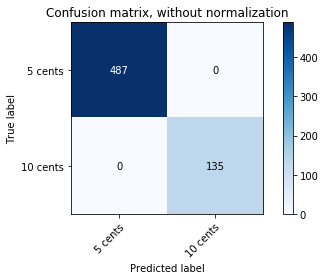

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

class_names= ['5 cents', '10 cents', '25 cents', '50 cents', '1 real']


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_testPlot, predictionsPlot, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


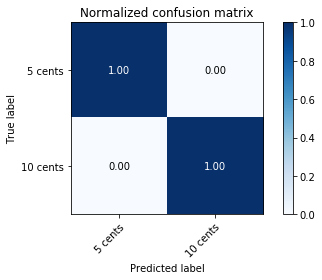

In [0]:

# Plot normalized confusion matrix
plot_confusion_matrix(y_testPlot, predictionsPlot, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Save the Model

In [0]:
model.save('/content/drive/My Drive/BrazilianCoins/BrazillianCoin.h5')

# model.save('/content/drive/My Drive/ColabNotebooks/Xception/modelXception.h5')